In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Рассмотрим схему испытаний Бернулли с вероятностью успеха $p$. Для него сопряженное априорное распределение - это бета-распределение с параметрами $\alpha$ и $\beta$. Построим несколько графиков для разных значений параметров $\alpha$ и $\beta$ и посмотрим, как значения параметров априорного распределения соотносятся с априорными знаниями о монете.

In [2]:
params = [(2, 10), (10, 2), (20, 20)]

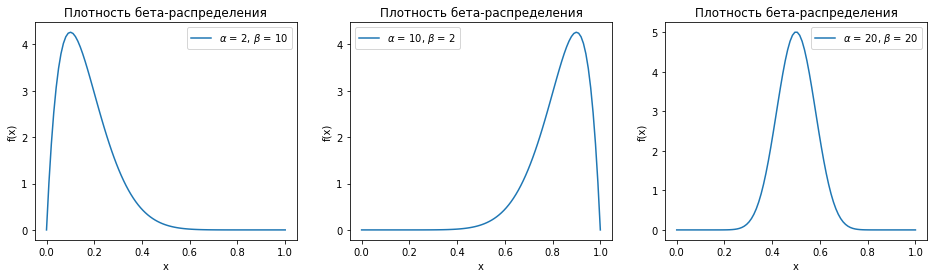

In [3]:
plt.figure(figsize=(16, 4))
for i, param in enumerate(params):
    plt.subplot(1, 3, i + 1)
    a, b = param
    x = np.linspace(0, 1, 100)
    plt.plot(x, sts.beta.pdf(x, a, b), 
             label = r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
    plt.title("Плотность бета-распределения")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(loc="best")

Как видно из графиков, чем больше значение параметра $\beta$ превосходит значение параметра $\alpha$, тем больше монета нечестна, перевес в сторону решки, а если значение параметра $\alpha$ превосходит значение параметра $\beta$, то монета нечестна, перевес в сторону герба. Если эти параметры приблизительно равны, то монета, скорее, честна.

Проведем по 20 "бросков" для разных монет и найдем байесовскую оценку параметра $p$ при различных параметрах априорного распределения и сравним их с оценками максимального правдоподобия. Оценка максимального правдоподобия равна $\overline{X}$. Апостериорное распределение - это бета-распределение с параметрами $\alpha + \sum_{i = 1}^n X_i$, $\beta + n - \sum_{i=1}^n X_i$. Матожидание по апостериорной плотности, а соотвтетсвенно и байесовская оценка параметра $p$, равняется $\frac{\alpha + \sum_{i = 1}^n X_i}{\alpha + \beta + n}$. Нарисуем график абсолютных величин отклонений оценок для каждого $n \leqslant 20$ от истинных значений для разных значений параметра $p$.

In [9]:
N = 20

Создадим функцию, которая на вход принимает значение параметра $p$ и для каждой оценки данного параметра строит график зависимости ее абсолютного отклонения от истинного значения от размера выборки.

In [18]:
def count_estimator(p):
    bern_rv = sts.bernoulli(p)
    sample = bern_rv.rvs(N)

    bayes_estimators = np.zeros(N)
    plt.figure(figsize=(12, 6))
    for param in params:
        a, b = param
        for n in range(1, N + 1):
            bayes_estimators[n - 1] = (a + sum(sample[:n])) / (a + b + n)
        plt.plot(range(1, N + 1), abs(p - bayes_estimators), 
            label=r"bayes $\alpha$ = {}, $\beta$ = {}".format(a, b))
    
    max_likelihood = np.zeros(N)
    for n in range(1, N + 1):
            max_likelihood[n - 1] = np.mean(sample[:n])
    plt.plot(range(1, N + 1), abs(p - max_likelihood),
            label="max_likelihood")
    
    plt.legend(loc="best")
    plt.title("""График зависимости модуля разности
    оценки и истинного значения p = {} от рамзера выборки""".format(p))
    plt.xlabel("n")
    plt.ylabel(r"|$p$ - $\hat{p}$|");

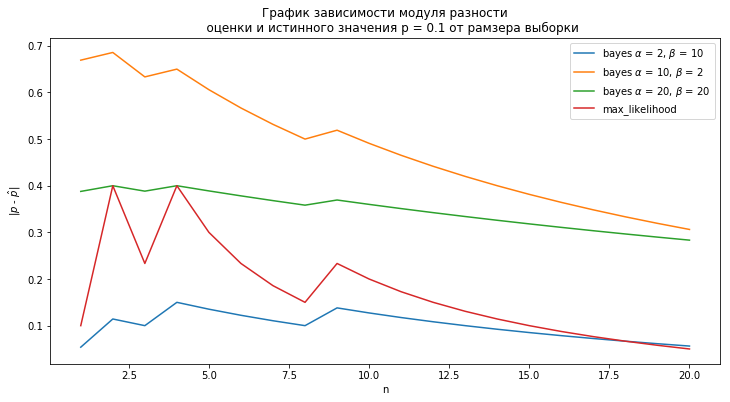

In [20]:
count_estimator(0.1)

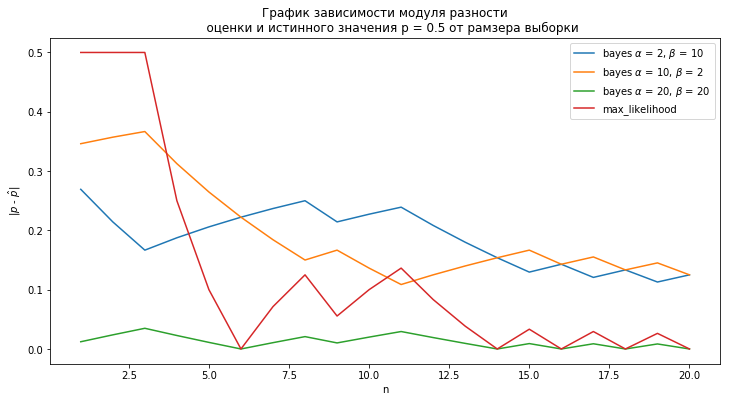

In [21]:
count_estimator(0.5)

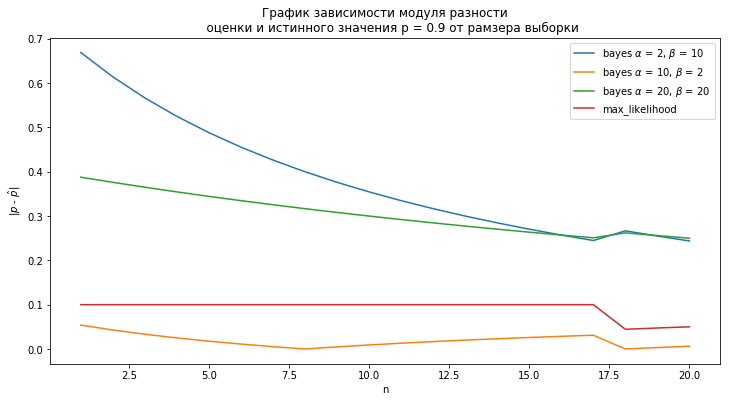

In [22]:
count_estimator(0.9)

Вывод: как видно из графиков, при наличии априорных знаний о монете (ее честность) с помощью байесовского метода можно оценить параметр $p$ более точно, чем даже методом максимального правдоподобия. Причем, действительно, наименьшое отклонение для разных параметров $p$ дали именно те сопряженные распределения, у которых наибольшое значение плотности вероятности достигалось вблизи реального значения параметра $p$, а остальные распределение дали очень большие отклонения, что значит, что при выборе значения параметров сопряженного распределения нужно быть очень осторожным, иначе оценка может заметно отличаться от истинного значения оцениваемого параметра. Кроме того, оценка максимального правдоподобия во всех трех случаях также имела очень небольшие отклонения от истинного значения и почти приближалась к наилучшей среди данных трех байесовских оценок. Таким образом, оценка методом максимального правдоподобия всегда дает неплохую оценку параметра, вне зависимости от его значения, но если мы знаем какие-то априорные данные, то можем воспользоваться байесовским методом для получения еще более точной оценки. 